# Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/training',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    class_names=["sc","healthy"],
    image_size=(508, 274))

Found 4617 files belonging to 2 classes.


In [3]:
val_data = tf.keras.utils.image_dataset_from_directory(
    directory='dataset/validation',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    class_names=["sc","healthy"],
    image_size=(508, 274))

Found 577 files belonging to 2 classes.


# Model building and training

In [4]:
resnet_model = Sequential()


pretrained_model = tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(508, 274,3),

                   pooling='avg',

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False
        

resnet_model.add(pretrained_model)

In [5]:
resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))

resnet_model.add(Dense(1, activation='sigmoid'))

In [6]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
print(resnet_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [7]:
history = resnet_model.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
145/145 [==============================] - 1631s 11s/step - loss: 0.7571 - accuracy: 0.5475 - val_loss: 0.6683 - val_accuracy: 0.5546
Epoch 2/30
145/145 [==============================] - 1810s 12s/step - loss: 0.6480 - accuracy: 0.6095 - val_loss: 0.7182 - val_accuracy: 0.5563
Epoch 3/30
145/145 [==============================] - 1727s 12s/step - loss: 0.6280 - accuracy: 0.6272 - val_loss: 0.6543 - val_accuracy: 0.5650
Epoch 4/30
145/145 [==============================] - 1509s 10s/step - loss: 0.6246 - accuracy: 0.6353 - val_loss: 0.5844 - val_accuracy: 0.7088
Epoch 5/30
145/145 [==============================] - 1671s 12s/step - loss: 0.5895 - accuracy: 0.6803 - val_loss: 0.5556 - val_accuracy: 0.7470
Epoch 6/30
145/145 [==============================] - 1772s 12s/step - loss: 0.6009 - accuracy: 0.6658 - val_loss: 0.5676 - val_accuracy: 0.6794
Epoch 7/30
145/145 [==============================] - 2564s 18s/step - loss: 0.5681 - accuracy: 0.6901 - val_loss: 0.5830 - val_ac

# Model evaluation

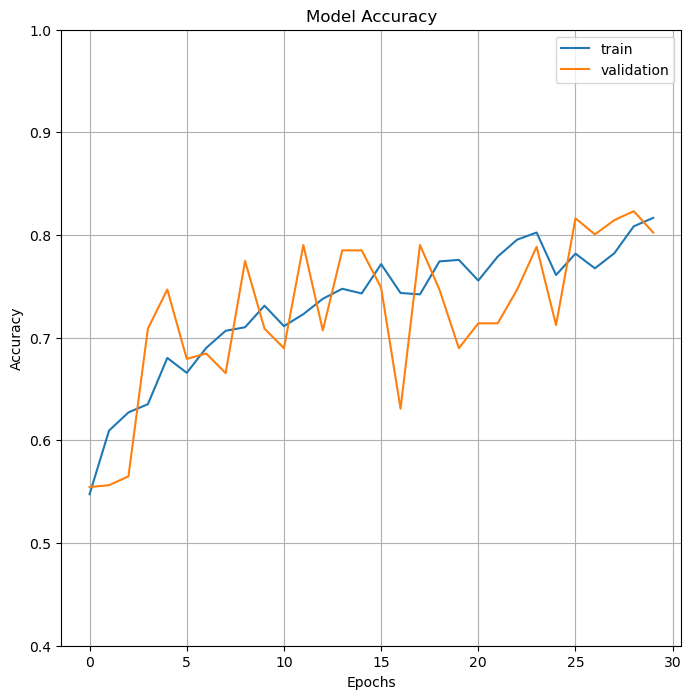

In [9]:
plt.figure(figsize=(8, 8))

epochs_range= range(30)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])



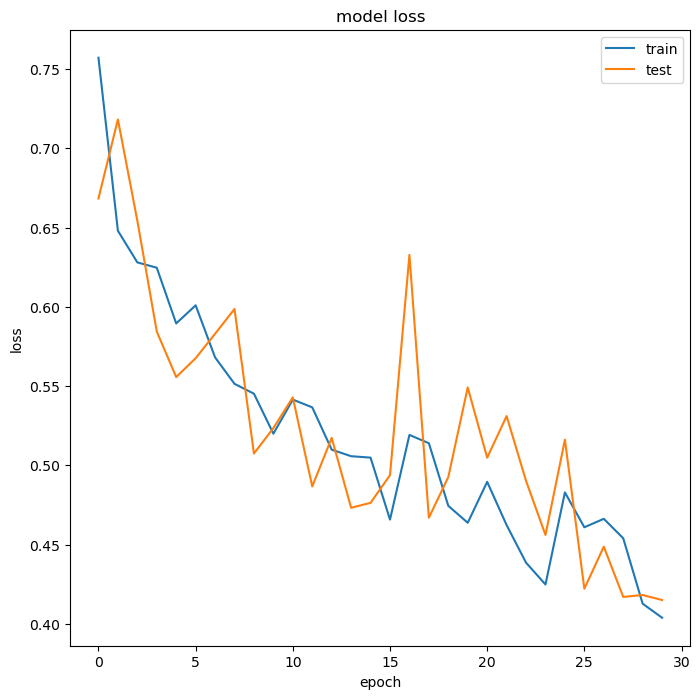

In [10]:
plt.figure(figsize=(8, 8))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
test_loss, test_acc = resnet_model.evaluate(val_data, verbose=2)
print(test_acc)

19/19 - 143s - loss: 0.4150 - accuracy: 0.8024 - 143s/epoch - 8s/step
0.8024263381958008


In [12]:
train_loss, train_acc = resnet_model.evaluate(train_data, verbose=2)
print(train_acc)

145/145 - 1861s - loss: 0.3736 - accuracy: 0.8395 - 1861s/epoch - 13s/step
0.8395061492919922
